<a href="https://colab.research.google.com/github/AaronKauffman/DeepLearning/blob/master/HW1_Visulaization_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
tf.logging.set_verbosity(tf.logging.ERROR)  # or any {DEBUG, INFO, WARN, ERROR, FATAL}

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:

data.test.cls = np.argmax(data.test.labels, axis=1)

print(data.test.cls)

[7 2 1 ... 4 5 6]


In [0]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_channels = 1
num_classes = 10

In [0]:

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

[7 2 1 0 4 1 4 9 5]


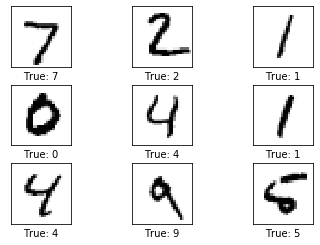

In [6]:

# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]
print(cls_true)

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [0]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [0]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [0]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [0]:
y_true_cls = tf.argmax(y_true, dimension=1)

In [0]:
def get_weights_variable(layer_name):
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')

    return variable

In [0]:
def runModel(num_train):
    global total_iterations
    
    weights_train = []
    #run 10 models
    for i in range(0,num_train):

        #all the labels need a model number to be distinct and not cause an error
        conv1_label = 'layer_conv1_M' + str(i)
        conv2_label = 'layer_conv2_M' + str(i)
        fc_label = 'layer_fc1_M' + str(i)
        out_label = 'layer_fc_out_M' + str(i)
        #Convolusional layer 1
        net = tf.layers.conv2d(inputs=x_image, name=conv1_label, padding='same', filters=16, kernel_size=5, activation=tf.nn.relu)
        net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

        #Convolusional layer 2
        net = tf.layers.conv2d(inputs=net, name=conv2_label, padding='same', filters=36, kernel_size=5, activation=tf.nn.relu)
        net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

        #Flatten layer
        net = tf.layers.flatten(net)

        #Fully connected layer
        net = tf.layers.dense(inputs=net, name=fc_label, units=128, activation=tf.nn.relu)

        #output layer
        logits = tf.layers.dense(inputs=net, name=out_label, units=num_classes, activation=None)
        #------
        y_pred = tf.nn.softmax(logits=logits)
        y_pred_cls = tf.argmax(y_pred, dimension=1)

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)

        loss = tf.reduce_mean(cross_entropy )

        opt = tf.train.AdamOptimizer(learning_rate=1e-4)
        optimizer = opt.minimize(loss )

        correct_prediction = tf.equal(y_pred_cls, y_true_cls)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        #-----
        trainable_var_list = tf.trainable_variables()
        #------
        weights_conv1 = get_weights_variable(conv1_label)
        weights_conv2 = get_weights_variable(conv2_label)
        weights_fc1 = get_weights_variable(fc_label)
        weights_fc_out = get_weights_variable(out_label)
        #-------
        session = tf.Session()
        session.run(tf.global_variables_initializer())
        batch_size = 64
        #------
        weight_vals=[]
        for i in range(0,30):
            x_batch, y_true_batch = data.train.next_batch(batch_size)

            feed_dict_train = {x: x_batch, y_true: y_true_batch}

            session.run(optimizer, feed_dict=feed_dict_train)
            # record values every 3 epochs.
            if i % 3 == 0:
            #loss_train_val = session.run(loss, feed_dict=feed_dict_train)
            #acc_train_val = session.run(accuracy, feed_dict=feed_dict_train)
                weight_vals = np.append(weight_vals, session.run(weights_fc1))
                #print(session.run(weights_fc1)[0])

        print(weight_vals)
        #-------
        #weights_array = np.concatenate(weight_vals, axis=0)
        #print(weights_array)
        weights_train.append(weight_vals)
        #print(weights_train)
        #---------
        session.close()
    weights_list.append(weights_train)

In [13]:
weights_list = []

runModel(8)
#print(weights_list)

[-0.05054864 -0.02973551 -0.02689223 ... -0.04298056 -0.02985568
  0.02217179]
[ 0.05238428 -0.02897292  0.01506043 ... -0.0030097  -0.00202444
 -0.0106429 ]
[ 0.01279339  0.03989588  0.03283026 ... -0.04710169  0.03470587
  0.00818142]
[ 0.00099677  0.01461452  0.03788839 ... -0.00845147  0.0378171
  0.05816912]
[ 0.05214959  0.0139059   0.00485063 ... -0.05378678 -0.00270598
  0.02256187]
[-0.00632768  0.00739252 -0.03216397 ...  0.04900751  0.01014699
 -0.01427535]
[ 0.03125427  0.02715809 -0.02666008 ... -0.03854865 -0.04977448
  0.00895185]
[ 0.0537022  -0.04986601 -0.03721575 ... -0.01267921  0.04629509
  0.018615  ]


In [0]:
from sklearn.decomposition import PCA
def plot_fc_weights(weights_list):
    session = tf.Session()
    session.run(tf.global_variables_initializer())
    # Assume weights in weights_list are TensorFlow ops for 2-dim variables
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    #w_list = session.run(weights_list)
    
    pca = PCA(n_components=2)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    
    count = 1
    for w in weights_list:
            
        
        #print(w.shape)
        labelName = "Train "+str(count)
        principalComponents = pca.fit_transform(w)

        ax.scatter(principalComponents[:,0], principalComponents[:,1], label=labelName, alpha=0.5)
        count += 1

    ax.legend()
    plt.show()

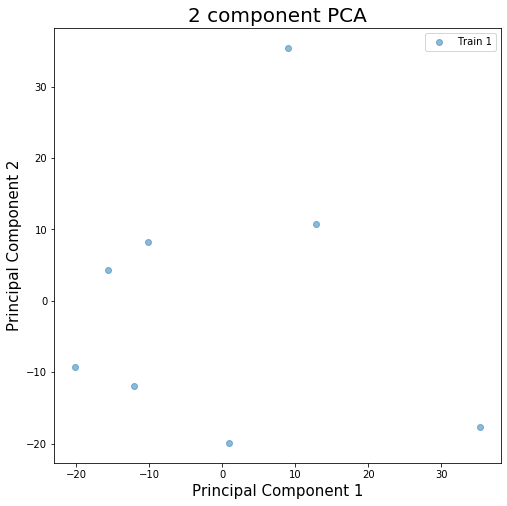

In [15]:
#print(weights_list)
plot_fc_weights(weights_list)


In [0]:

# This has been commented out in case you want to modify and experiment
# with the Notebook without having to restart it.
# session.close()